In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

<center>

# <span style="color:blue;">Cambio tipo di output</span>

<center>

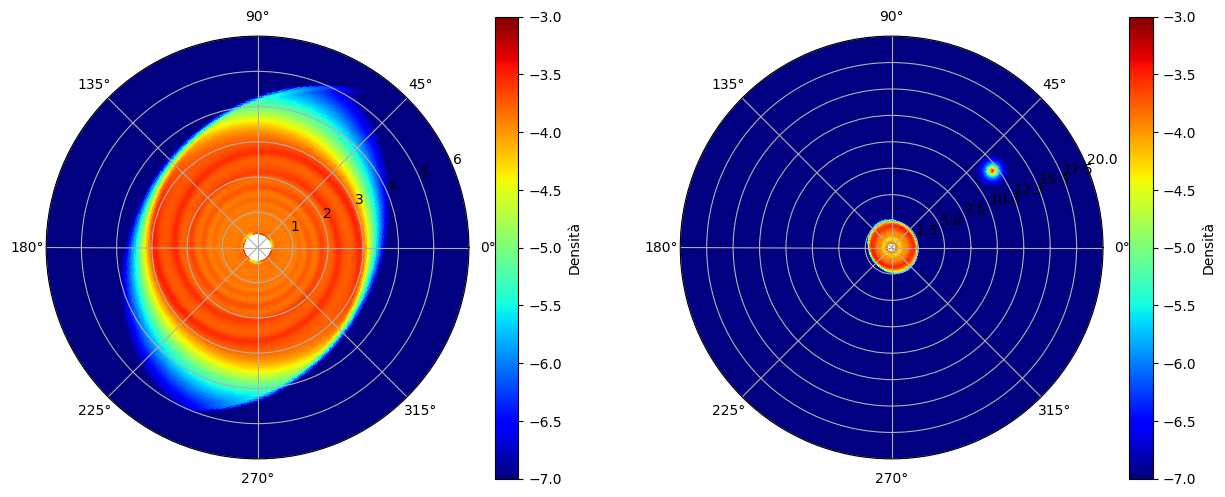

In [2]:
fig = plt.figure(figsize=(15, 6))

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 384)
r = np.linspace(0.4, 6, 128)
Theta, R = np.meshgrid(theta, r)

#Grafico 1
ax1 = fig.add_subplot(1, 2, 1, projection='polar')
rho = np.fromfile("Dati/Sistema3/CambioOut/gasdens24.dat").reshape(128,384)
cax = ax1.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
plt.colorbar(cax, label='Densità')
ax1.set_rmin(0)
ax1.set_rmax(6)

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 768)
r = np.linspace(0.4, 20, 256)
Theta, R = np.meshgrid(theta, r)


#Grafico 2
ax2 = fig.add_subplot(1, 2, 2, projection='polar')
rho = np.fromfile("Dati/Sistema3/CambioOut/gasdens210.dat").reshape(256,768)
cax = ax2.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
plt.colorbar(cax, label='Densità')
ax2.set_rmin(0)
ax2.set_rmax(20)

plt.show()

<center>

# <span style="color:blue;">Prima run: intero sistema binario</span>

<center>

### Condizione iniziale

<center>

![Alt text](Immagini/Sistema3/PrimaRun/CondIn.png)

</center>

### Orbite

<center>

![Alt text](Immagini/Sistema3/PrimaRun/Orbite.png)

</center>

### Primi Output

<center>

![Alt text](Immagini/Sistema3/PrimaRun/PrimiOut.png)

</center>

### Prima orbita

<center>

![Alt text](Immagini/Sistema3/PrimaRun/PrimaOrb.png)

<center>

### Dimensioni dischi

In [3]:
#Importo la densità considerata
rho = np.fromfile("Dati/Sistema3/PrimaRun/Orb1/gasdens3.dat").reshape(384,1152)
massa = 0

for i in range(0,160):
    #Calcolo area della singola sezione
    area = np.pi * (pow(((i+1)*(24.0-0.4)/384 + 0.4),2)-pow((i*(24-0.4)/384 + 0.4),2))
    area = area/1152

    for j in range(0, 1152):
        massa += area * rho[i, j]

#Controllo ora dove ottengo il 99% della massa
appo = 0
raggio = 0

for i in range(0,160):
    #Calcolo area della singola sezione
    area = np.pi * (pow(((i+1)*(24.0-0.4)/384 + 0.4),2)-pow((i*(24-0.4)/384 + 0.4),2))
    area = area/1152

    raggio = (i+1)*(24.0-0.4)/384 + 0.4

    for j in range(0, 1152):
        appo += area * rho[i, j]
    
    if appo >= 0.999*massa:
        break

print('Il raggio di troncamento del disco è pari a: ' + str(raggio))

Il raggio di troncamento del disco è pari a: 4.394791666666666


<center>

# <span style="color:blue;">Seconda run: ragiono sulle condizioni al contorno</span>

<center>

### Opzione 1: su Ymax pongo condizione simmetrica

<center>

![Alt text](Immagini/Sistema3/SecondaRun/sym.png)

<center>

### Opzione 2: su Ymax pongo condizione anti-simmetrica

<center>

![Alt text](Immagini/Sistema3/SecondaRun/antisym.png)

<center>

### Massa del disco in funzione dell'output

In [4]:
sym = np.zeros(22)
antisym = np.zeros(22)

for h in range(0, 2):
    for k in range(0, 22):
        #Importo la densità considerata
        if h==0: 
            rho = np.fromfile("Dati/Sistema3/SecondaRun/Sym/gasdens" + str(k) + ".dat").reshape(128,384)
        else:
            rho = np.fromfile("Dati/Sistema3/SecondaRun/AntiSym/gasdens" + str(k) + ".dat").reshape(128,384)

        massa = 0
        for i in range(0,128):
            #Calcolo area della singola sezione
            area = np.pi * (pow(((i+1)*(4-0.4)/128 + 0.4),2)-pow((i*(4-0.4)/128 + 0.4),2))
            area = area/384

            for j in range(0, 384):
                massa += area * rho[i, j]
        
        if h==0:
            sym[k] = massa
        
        else:
            antisym[k] = massa

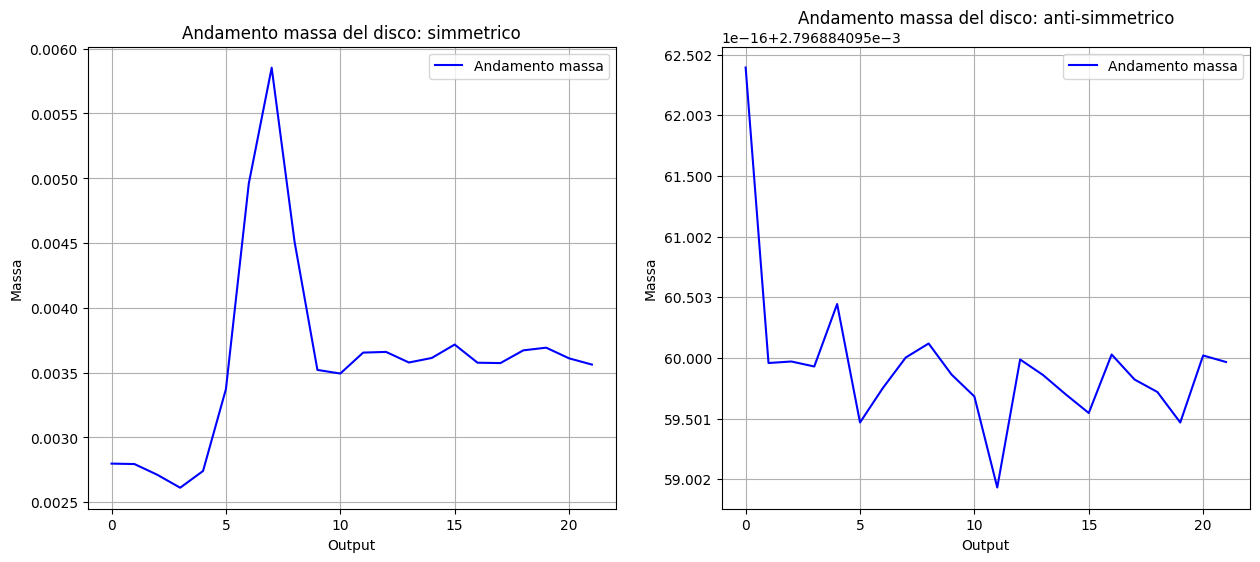

In [5]:
fig = plt.figure(figsize=(15, 6))

#Asse x grafici
x = np.zeros(22)
for i in range(0, len(x)):
    x[i] = i

#Grafico 1
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(x, sym, color = 'blue', label = 'Andamento massa')
ax1.set_title('Andamento massa del disco: simmetrico')
ax1.set_xlabel('Output')
ax1.set_ylabel('Massa')
ax1.grid(True)
ax1.legend()


#Grafico 2
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(x, antisym, color = 'blue', label = 'Andamento massa')
ax2.set_title('Andamento massa del disco: anti-simmetrico')
ax2.set_xlabel('Output')
ax2.set_ylabel('Massa')
ax2.grid(True)
ax2.legend()

plt.show()

Nel caso simmetrico è come se andasse ad aumentare la massa del disco: perchè questo succede? Prendo in considerazione cosa succede per i primi output con condizione simmetrica.

<center>

![Alt text](Immagini/Sistema3/SecondaRun/primisym.png)

<center>

<center>

# <span style="color:blue;">Terza run: introduco l'eccentricità</span>

<center>

Il sistema che andiamo ora a prendere in considerazione è il seguente: stella di massa unitaria nel centro del SR, stella di massa 3 orbitante attorno alla stella. L'orbita è caratterizzata da un'eccentricità: $e\,=\,0.1$. Mi aspetto che il disco circum-secondario sia di dimensioni inferiori rispetto a quelle osservate nel caso di un sistema circolare.

### Prima Orbita

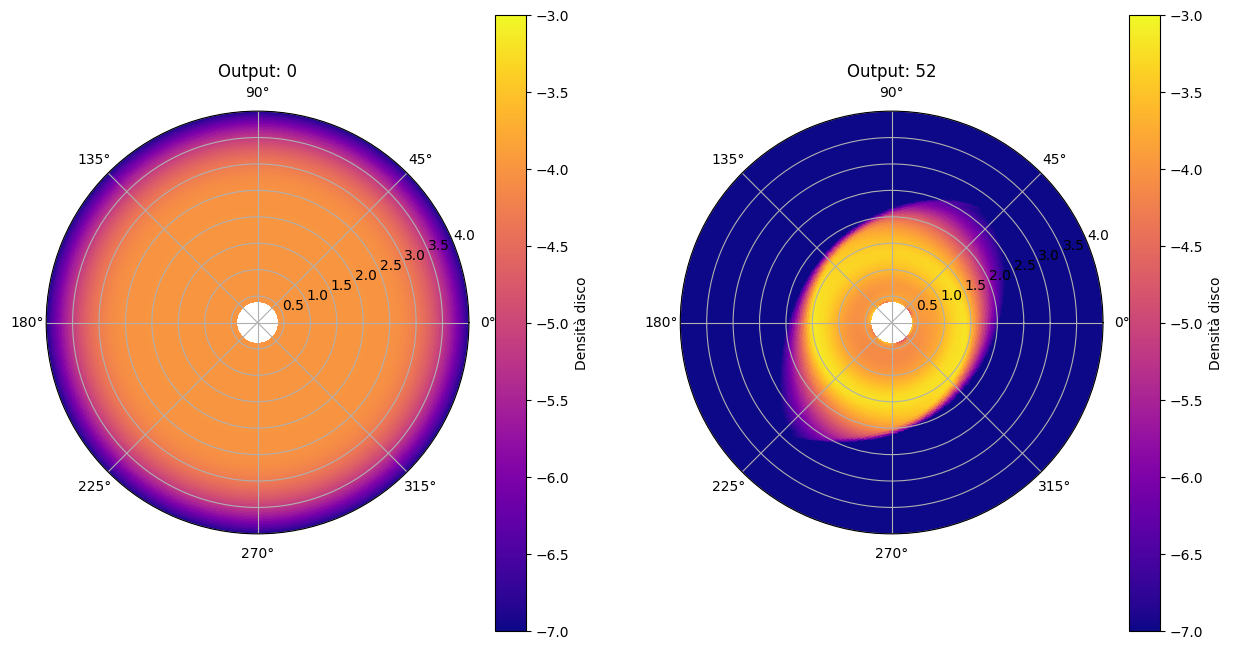

In [6]:
# Impostare il numero di grafici polari che desideri nella stessa figura
num_grafici = 2

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 384)
r = np.linspace(0.4, 4, 128)
Theta, R = np.meshgrid(theta, r)

# Creare una figura con più grafici polari
fig, axs = plt.subplots(1, 2, figsize=(15, 8), subplot_kw={'projection': 'polar'})

for i in range(0, 1):
    for j in range(0, 2):
        ax = axs[j]

        #Valori assunti dalla funzione
        rho = np.fromfile("Dati/Sistema3/TerzaRun/gasdens"+ str((2*i+j)*52) + ".dat").reshape(128, 384)

        # Disegnare il grafico polare
        cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='plasma', vmin = -7, vmax =-3)
        plt.colorbar(cax, label='Densità disco')
        ax.set_rmin(0)
        ax.set_rmax(4)
        ax.set_title(f'Output: ' + str((2*i+j)*52))
    
    

# Mostrare la figura con i grafici polari multipli
plt.show()

### Dimensioni del disco

In [7]:
#Importo la densità considerata
rho = np.fromfile("Dati/Sistema3/TerzaRun/gasdens52.dat").reshape(128,384)
massa = 0

for i in range(0,128):
    #Calcolo area della singola sezione
    area = np.pi * (pow(((i+1)*(4-0.4)/128 + 0.4),2)-pow((i*(4-0.4)/128 + 0.4),2))
    area = area/384

    for j in range(0, 384):
        massa += area * rho[i, j]

#Controllo ora dove ottengo il 99% della massa
appo = 0
raggio = 0

for i in range(0,128):
    #Calcolo area della singola sezione
    area = np.pi * (pow(((i+1)*(4-0.4)/128 + 0.4),2)-pow((i*(4-0.4)/128 + 0.4),2))
    area = area/384

    raggio = (i+1)*(4-0.4)/128 + 0.4

    for j in range(0, 384):
        appo += area * rho[i, j]
    
    if appo >= 0.999*massa:
        break

print('Il raggio di troncamento del disco è pari a: ' + str(raggio))

Il raggio di troncamento del disco è pari a: 2.228125


<center>

# <span style="color:blue;">Quarta run: studio differenze con/senza damping</span>

<center>

Il setup fisico che simulo è il disco circum-secondario. Le due stelle si trovano ad una distanza pari a 12 l'una dall'altra e la loro orbita ha eccentricità nulla.

### Opzione 1: senza damping

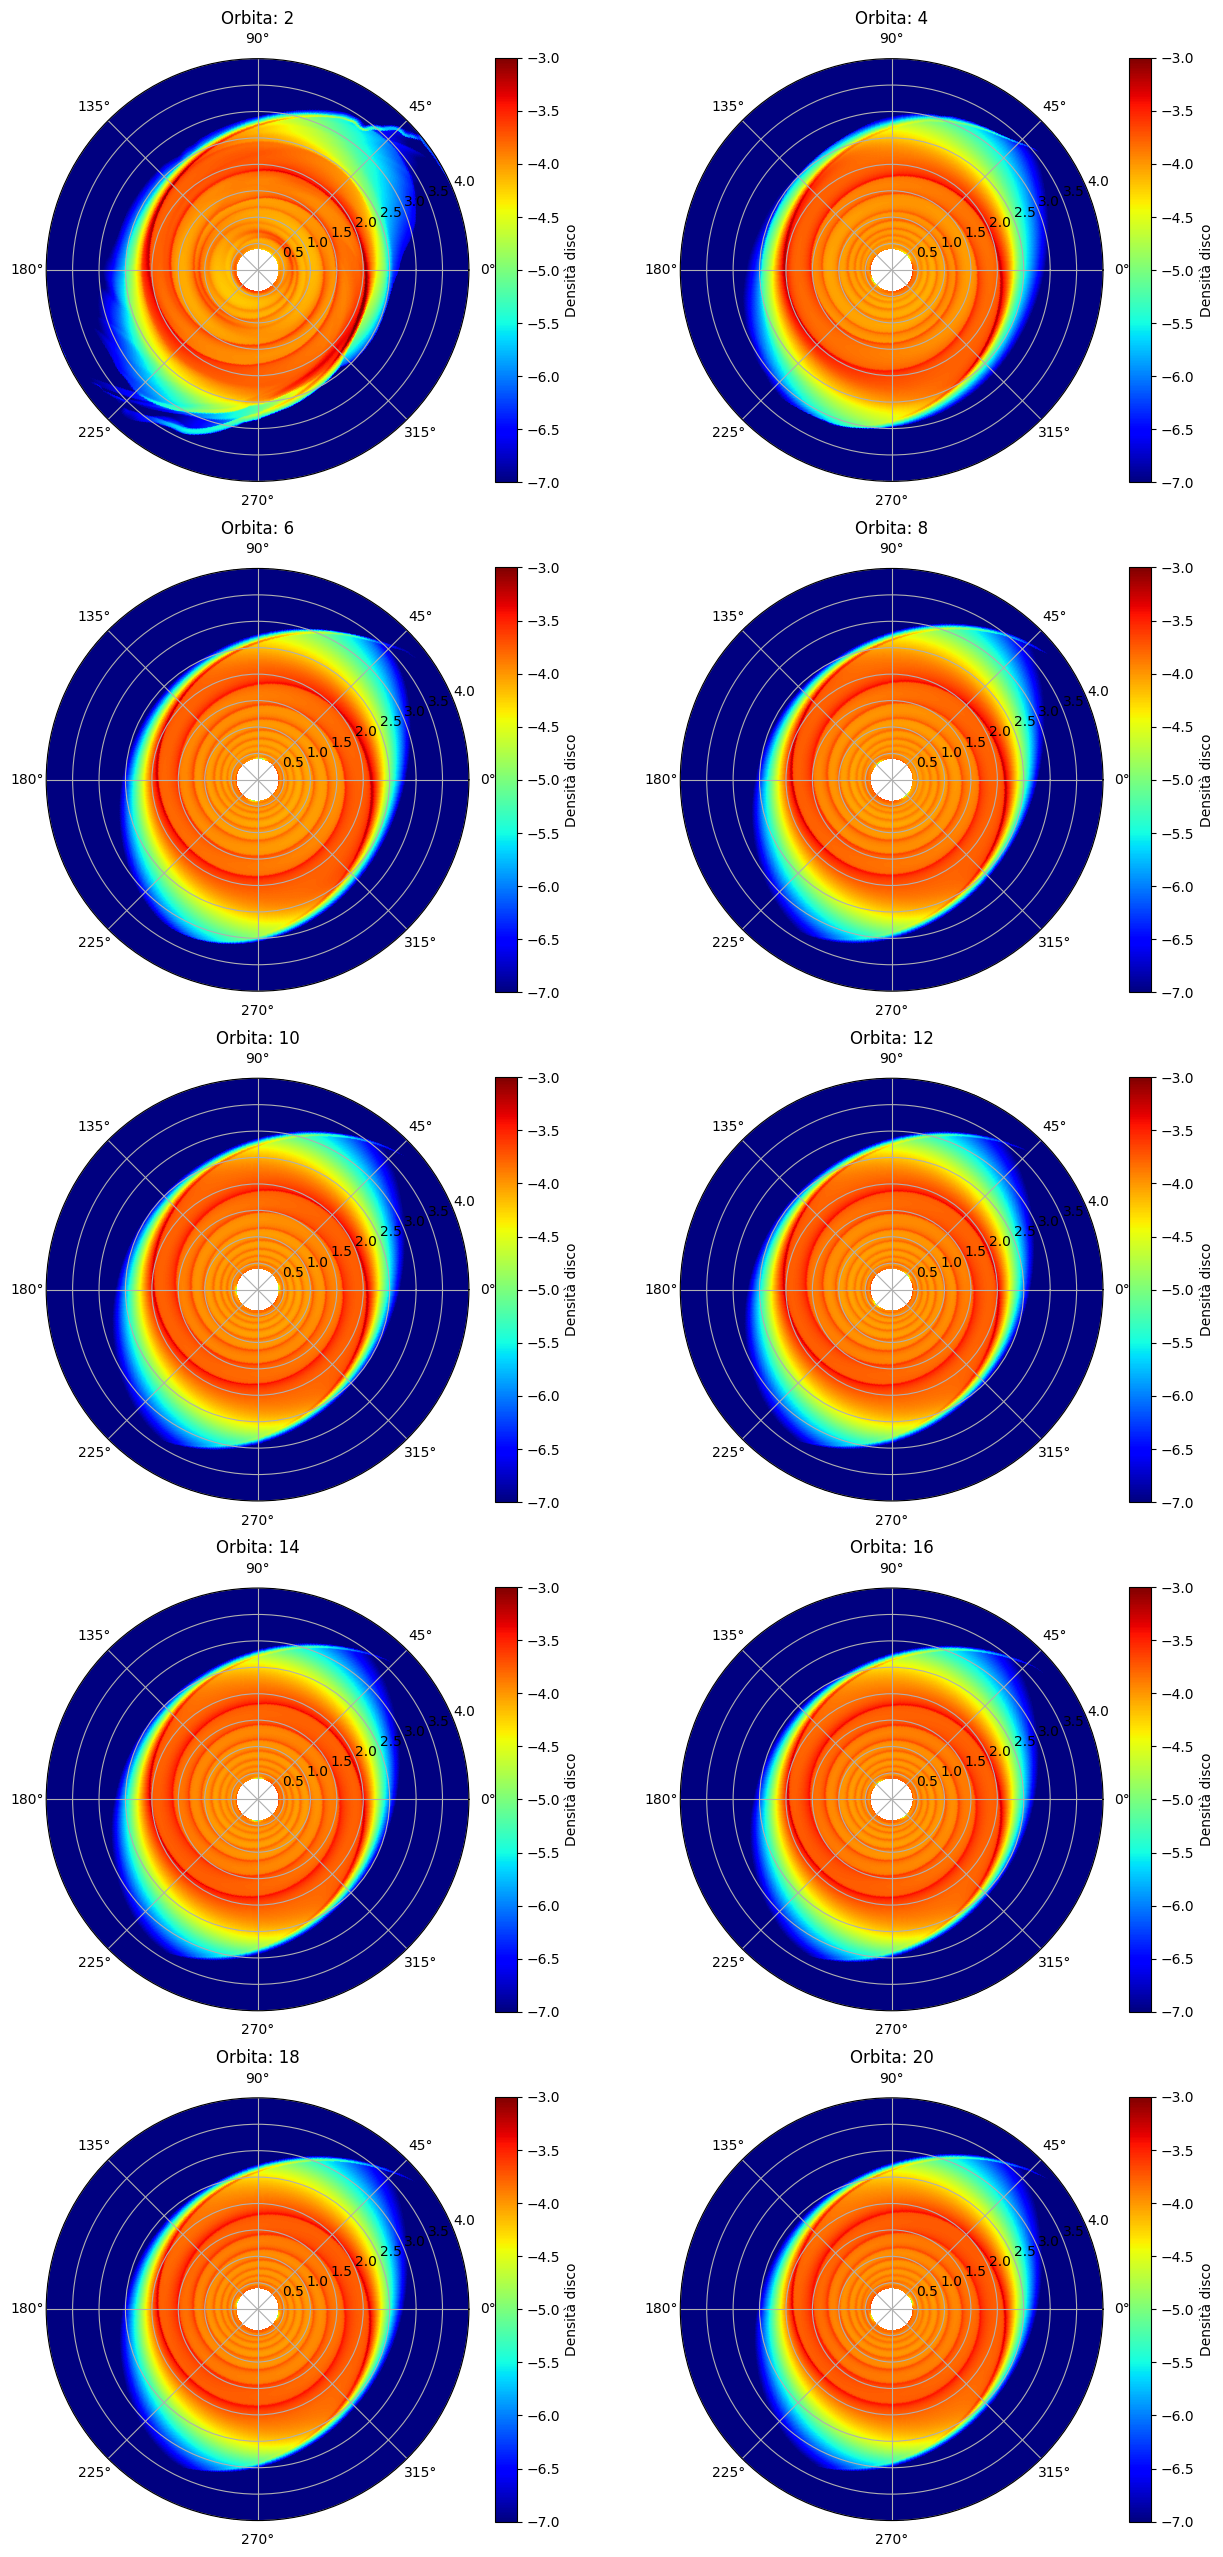

In [8]:
# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 1152)
r = np.linspace(0.4, 4, 384)
Theta, R = np.meshgrid(theta, r)

# Creare una figura con più grafici polari
fig, axs = plt.subplots(5, 2, figsize=(15, 32), subplot_kw={'projection': 'polar'})

for i in range(0, 5):
    for j in range(0, 2):
        ax = axs[i, j]

        #Valori assunti dalla funzione
        rho = np.fromfile("Dati/Sistema3/QuartaRun/NoDump/gasdens"+ str((2*i+j+1)*2) + ".dat").reshape(384, 1152)

        # Disegnare il grafico polare
        cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
        plt.colorbar(cax, label='Densità disco')
        ax.set_rmin(0)
        ax.set_rmax(4)
        ax.set_title(f'Orbita: ' + str((2*i+j+1)*2))
    
    

# Mostrare la figura con i grafici polari multipli
plt.show()

Calcolo il raggio del disco considerando le orbite dalla decima alla ventesima.

In [9]:
rag = np.zeros(21)

for k in range(0, 21):
    #Importo la densità considerata
    rho = np.fromfile("Dati/Sistema3/QuartaRun/NoDump/gasdens" + str(20 + k) + ".dat").reshape(384,1152)
    massa = 0

    for i in range(0,384):
        #Calcolo area della singola sezione
        area = np.pi * (pow(((i+1)*(4-0.4)/384 + 0.4),2)-pow((i*(4-0.4)/384 + 0.4),2))
        area = area/1152

        for j in range(0, 1152):
            massa += area * rho[i, j]

    #Controllo ora dove ottengo il 99% della massa
    appo = 0
    raggio = 0

    for i in range(0,384):
        #Calcolo area della singola sezione
        area = np.pi * (pow(((i+1)*(4-0.4)/384 + 0.4),2)-pow((i*(4-0.4)/384 + 0.4),2))
        area = area/1152

        raggio = (i+1)*(4-0.4)/384 + 0.4

        for j in range(0, 1152):
            appo += area * rho[i, j]
    
        if appo >= 0.999*massa:
            rag[k] = raggio
            break

med = 0
for i in range(0, len(rag)):
    med += rag[i]

print('Il raggio di troncamento del disco è pari a: ' + str(round(med/len(rag), 3)))

Il raggio di troncamento del disco è pari a: 2.854


### Opzione 2: con damping

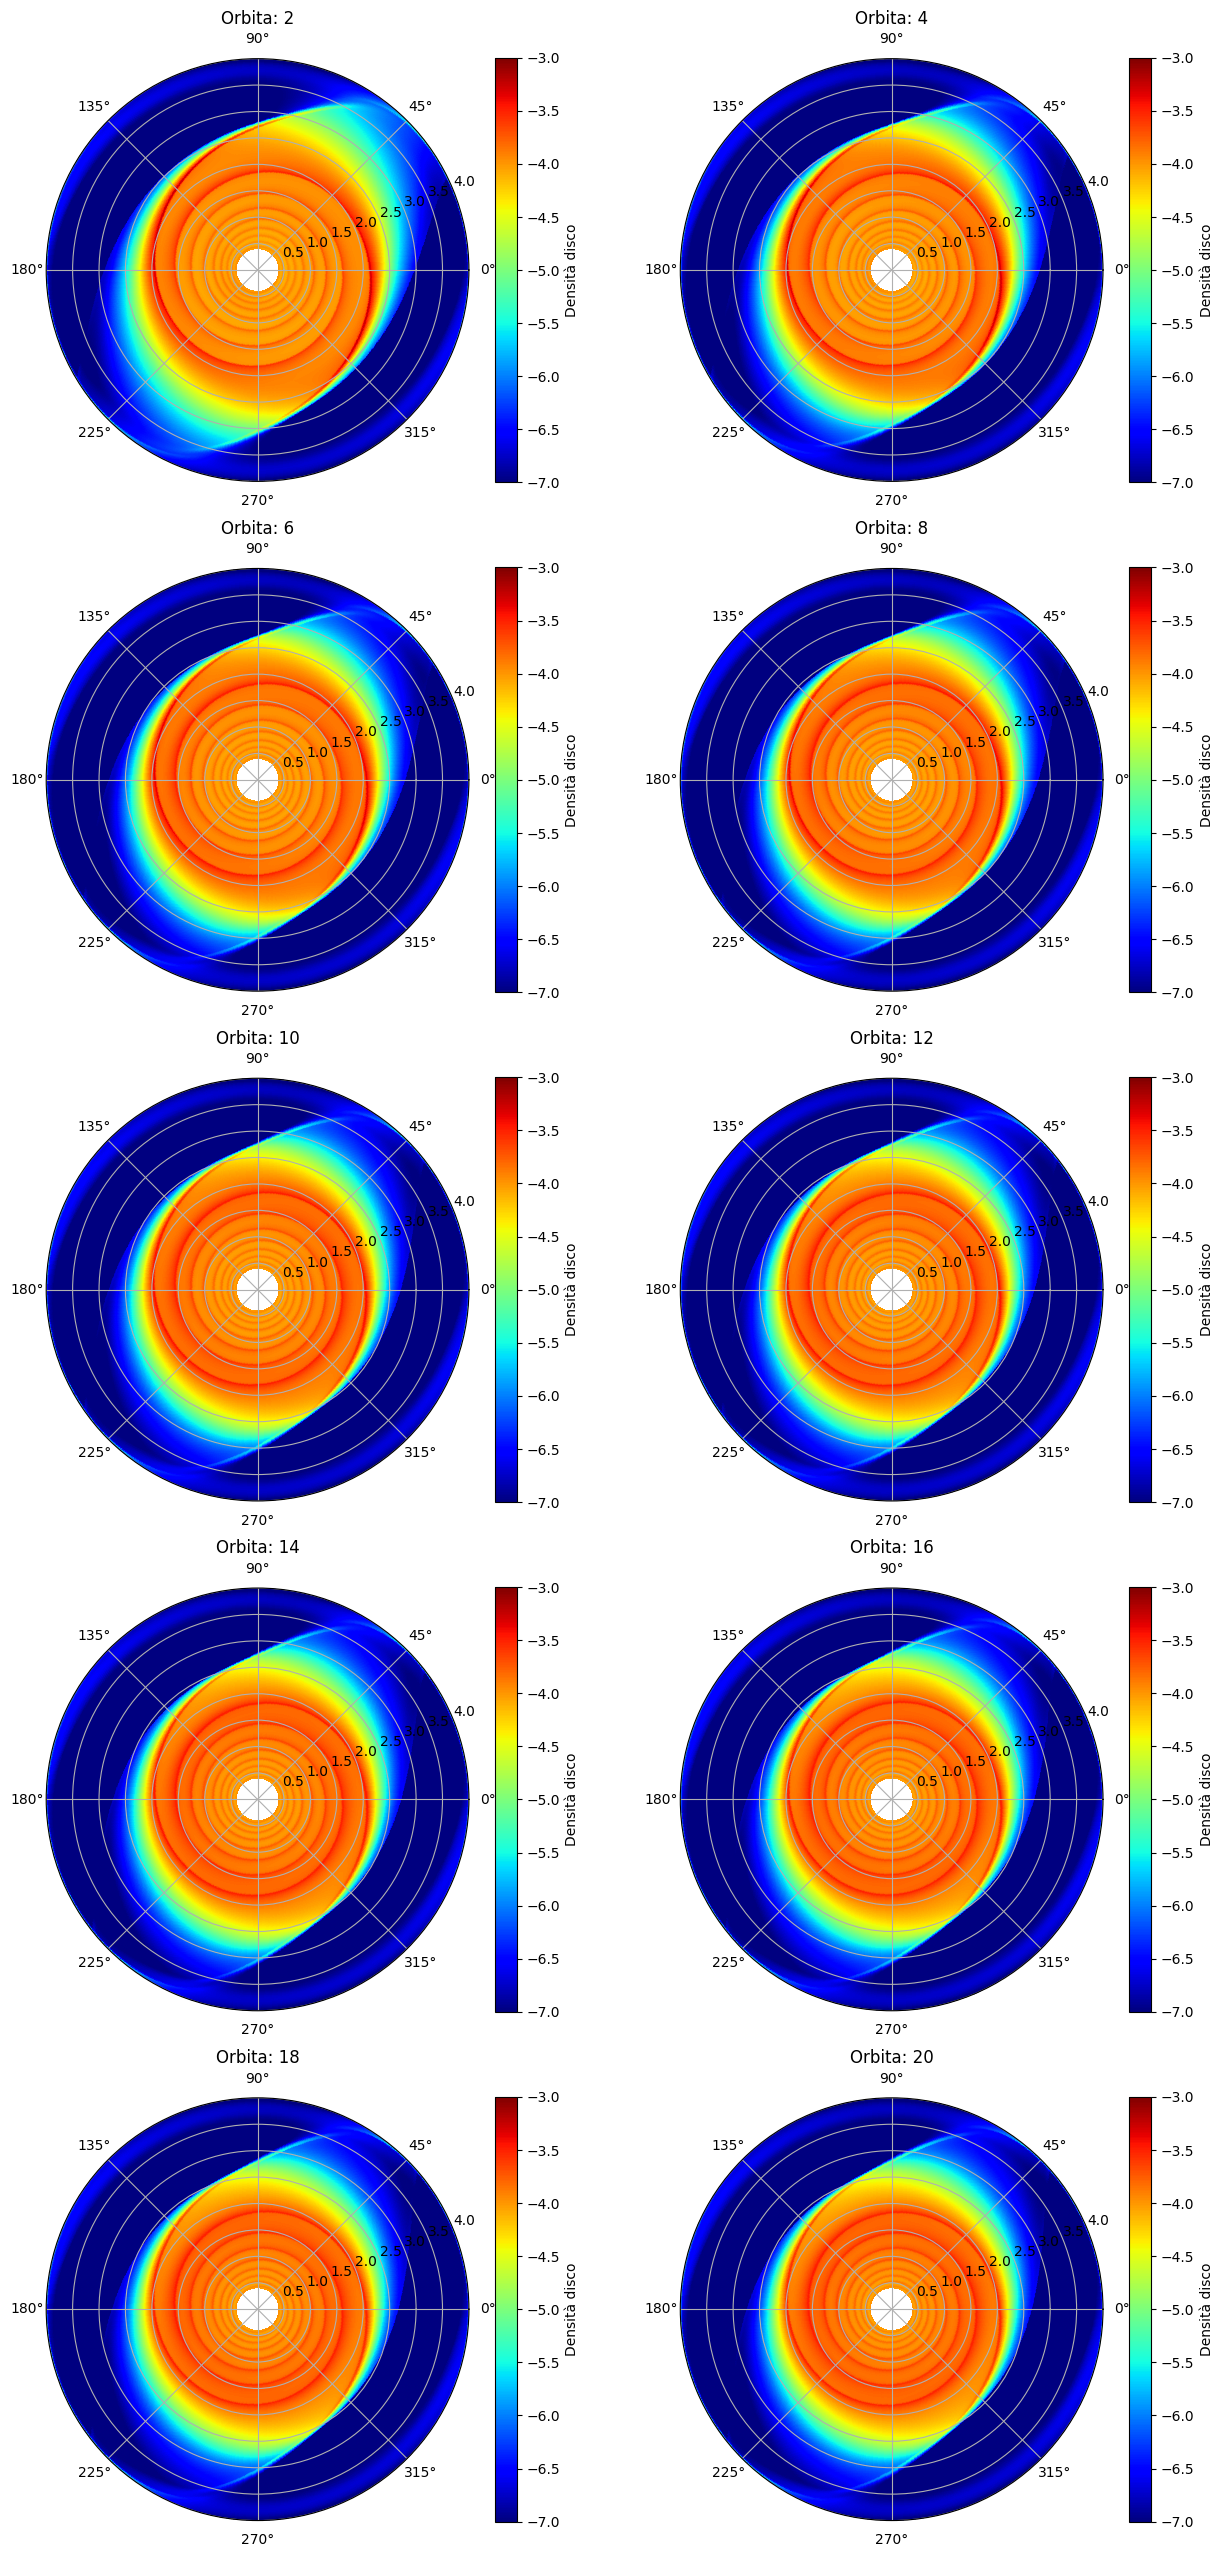

In [10]:
# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 1152)
r = np.linspace(0.4, 4, 384)
Theta, R = np.meshgrid(theta, r)

# Creare una figura con più grafici polari
fig, axs = plt.subplots(5, 2, figsize=(15, 32), subplot_kw={'projection': 'polar'})

for i in range(0, 5):
    for j in range(0, 2):
        ax = axs[i, j]

        #Valori assunti dalla funzione
        rho = np.fromfile("Dati/Sistema3/QuartaRun/SiDump/gasdens"+ str((2*i+j+1)*2) + ".dat").reshape(384, 1152)

        # Disegnare il grafico polare
        cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
        plt.colorbar(cax, label='Densità disco')
        ax.set_rmin(0)
        ax.set_rmax(4)
        ax.set_title(f'Orbita: ' + str((2*i+j+1)*2))
    
    

# Mostrare la figura con i grafici polari multipli
plt.show()

In [11]:
rag = np.zeros(5)

for k in range(0, 5):
    #Importo la densità considerata
    rho = np.fromfile("Dati/Sistema3/QuartaRun/SiDump/gasdens" + str(4 + k) + ".dat").reshape(384,1152)
    massa = 0

    for i in range(0,384):
        #Calcolo area della singola sezione
        area = np.pi * (pow(((i+1)*(4-0.4)/384 + 0.4),2)-pow((i*(4-0.4)/384 + 0.4),2))
        area = area/1152

        for j in range(0, 1152):
            massa += area * rho[i, j]

    #Controllo ora dove ottengo il 99.7% della massa
    appo = 0
    raggio = 0

    for i in range(0,384):
        #Calcolo area della singola sezione
        area = np.pi * (pow(((i+1)*(4-0.4)/384 + 0.4),2)-pow((i*(4-0.4)/384 + 0.4),2))
        area = area/1152

        raggio = (i+1)*(4-0.4)/384 + 0.4

        for j in range(0, 1152):
            appo += area * rho[i, j]
    
        if appo >= 0.997*massa:
            rag[k] = raggio
            break

med = 0
for i in range(0, len(rag)):
    med += rag[i]

print('Il raggio di troncamento del disco è pari a: ' + str(round(med/(len(rag)), 3)))

Il raggio di troncamento del disco è pari a: 2.843


<center>

# <span style="color:blue;">Quinta run: studio outer boundary condition</span>

<center>

Ho provato a implementare una outer boundary condition a diodo. Vediamo se effettivamente la massa diminuisce nel tempo come mi aspetterei di osservare.

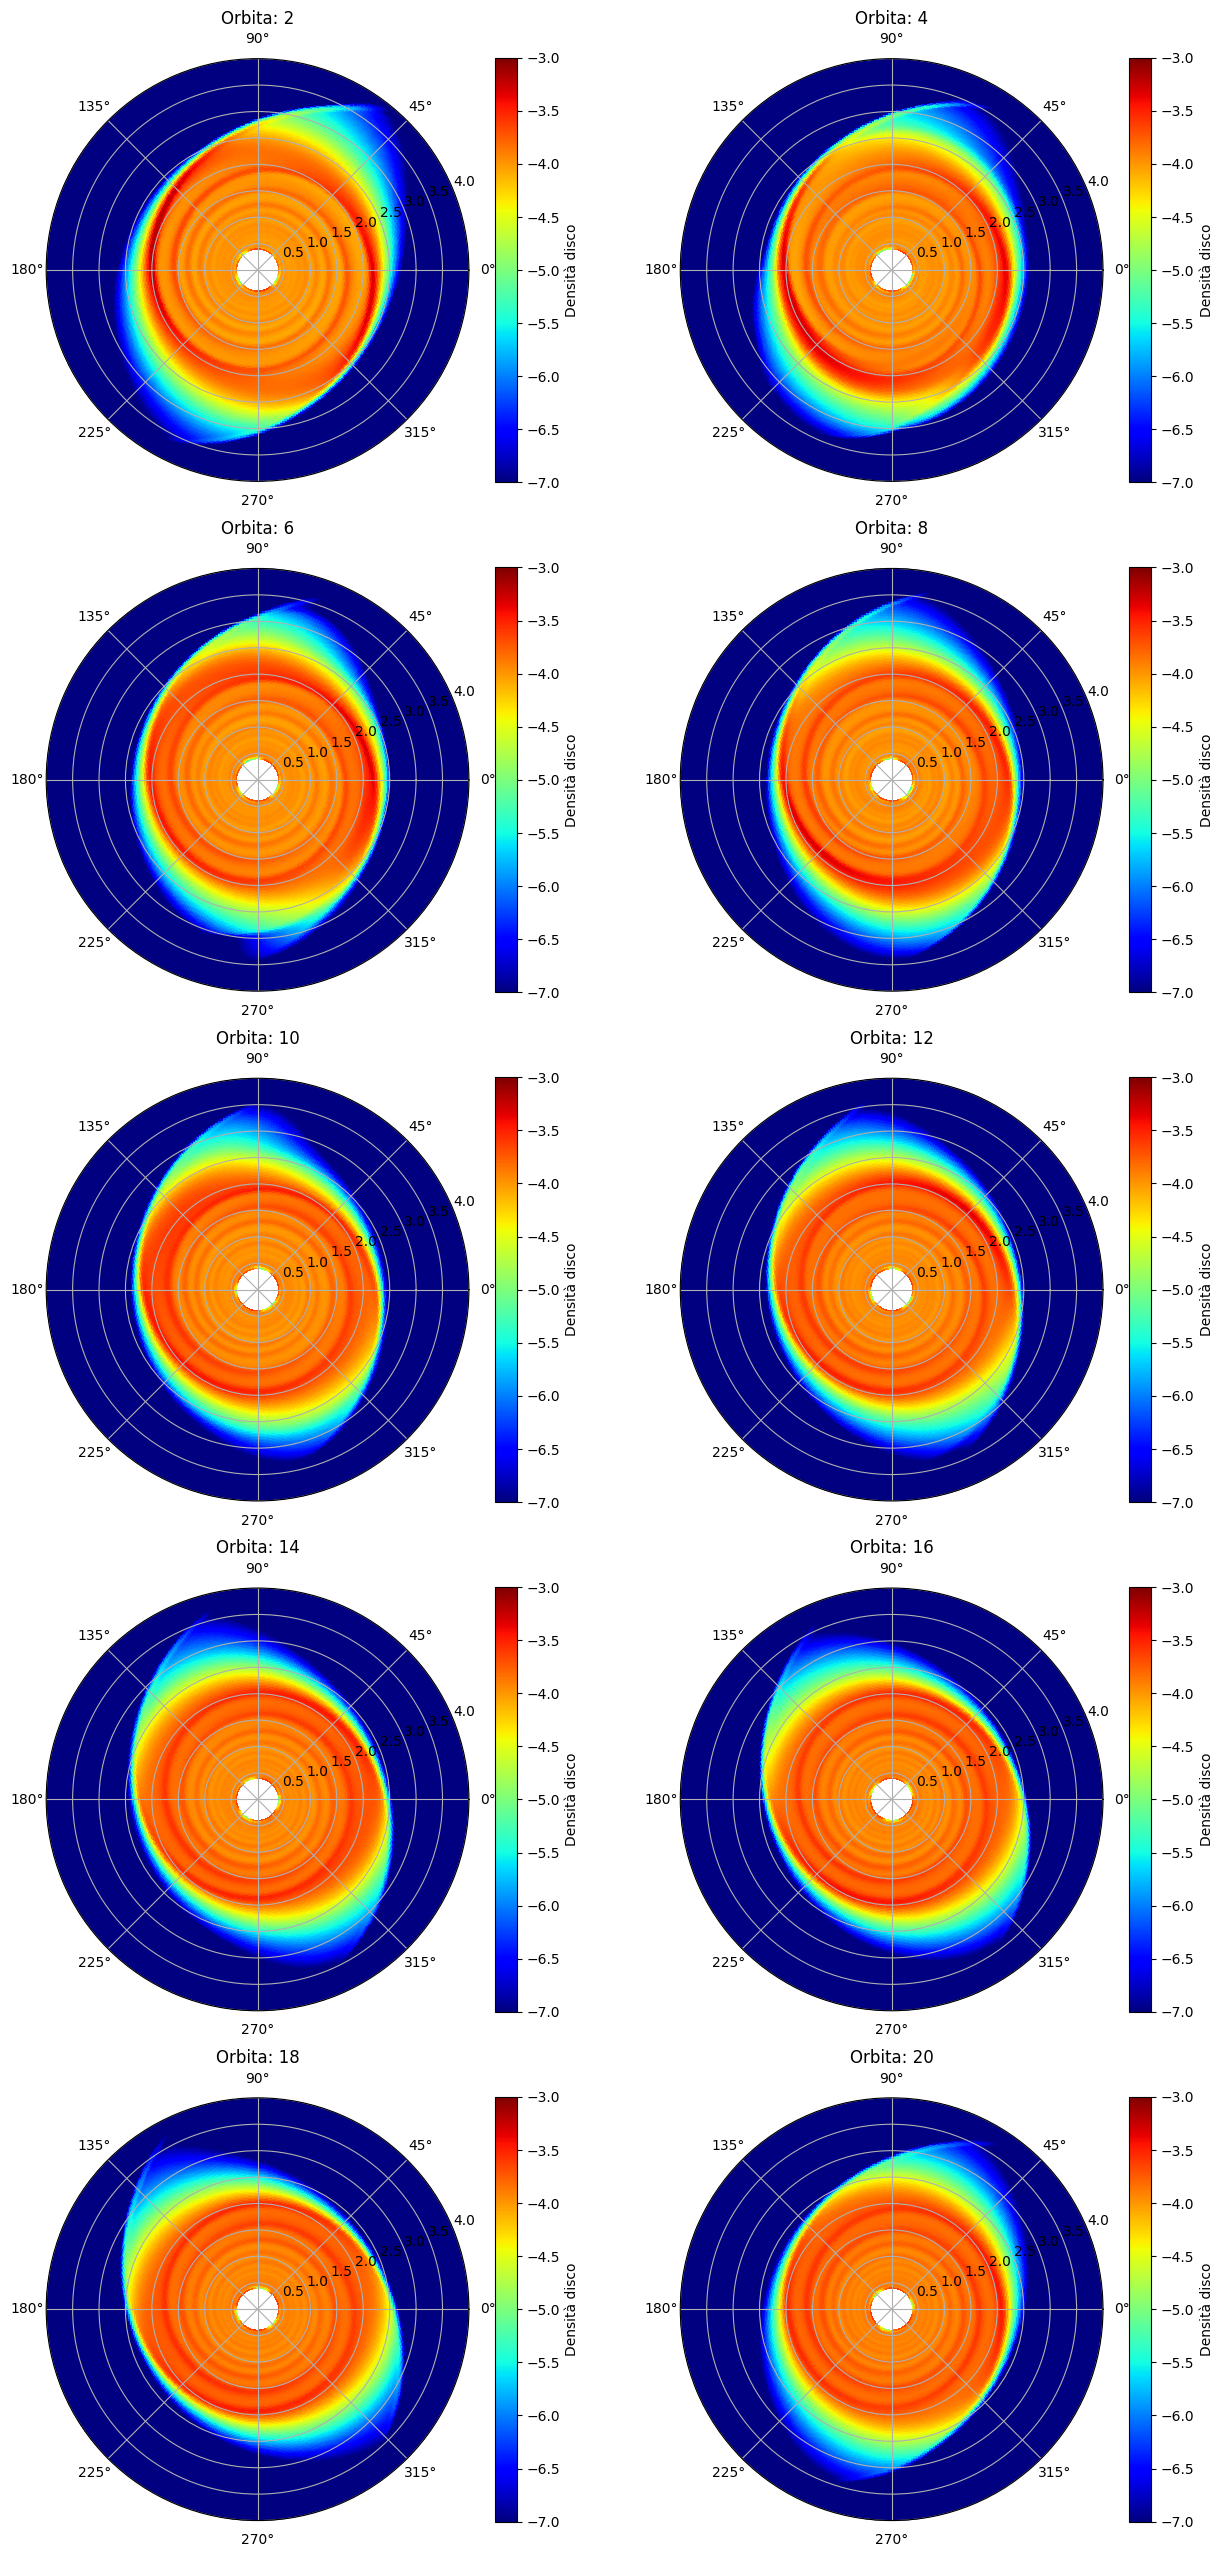

In [18]:
### Orbite
# Impostare il numero di grafici polari che desideri nella stessa figura
num_grafici = 10

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 384)
r = np.linspace(0.4, 4, 128)
Theta, R = np.meshgrid(theta, r)

# Creare una figura con più grafici polari
fig, axs = plt.subplots(5, 2, figsize=(15, 32), subplot_kw={'projection': 'polar'})

for i in range(0, 5):
    for j in range(0, 2):
        ax = axs[i, j]

        if 2*i + j < 9:
            #Valori assunti dalla funzione
            rho = np.fromfile("Dati/Sistema3/QuintaRun/gasdens"+ str((2*i+j+1)*42) + ".dat").reshape(128, 384)

        else:
            #Valori assunti dalla funzione
            rho = np.fromfile("Dati/Sistema3/QuintaRun/gasdens416.dat").reshape(128, 384)

        # Disegnare il grafico polare
        cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax = -3)
        plt.colorbar(cax, label='Densità disco')
        ax.set_rmin(0)
        ax.set_rmax(4)
        ax.set_title(f'Orbita: ' + str((2*i+j+1)*2))
    
    

# Mostrare la figura con i grafici polari multipli
plt.show()

### Raggio

In [1]:
rag = np.zeros(36)

for k in range(0, 36):
    #Importo la densità considerata
    rho = np.fromfile("Dati/Sistema3/QuintaRun/gasdens" + str(380 + k) + ".dat").reshape(128,384)
    massa = 0

    for i in range(0,128):
        #Calcolo area della singola sezione
        area = np.pi * (pow(((i+1)*(4-0.4)/128 + 0.4),2)-pow((i*(4-0.4)/128 + 0.4),2))
        area = area/384

        for j in range(0, 384):
            massa += area * rho[i, j]

    #Controllo ora dove ottengo il 99% della massa
    appo = 0
    raggio = 0

    for i in range(0,128):
        #Calcolo area della singola sezione
        area = np.pi * (pow(((i+1)*(4-0.4)/128 + 0.4),2)-pow((i*(4-0.4)/128 + 0.4),2))
        area = area/384

        raggio = (i+1)*(4-0.4)/128 + 0.4

        for j in range(0, 384):
            appo += area * rho[i, j]
    
        if appo >= 0.999*massa:
            rag[k] = raggio
            break

med = 0
for i in range(0, len(rag)):
    med += rag[i]

print('Il raggio di troncamento del disco è pari a: ' + str(round(med/(len(rag)), 3)))

NameError: name 'np' is not defined

### Massa del disco in funzione dell'output

In [14]:
mas_dis = np.zeros(417)


for k in range(0, 417):
    rho = np.fromfile("Dati/Sistema3/QuintaRun/gasdens" + str(k) + ".dat").reshape(128,384)

    massa = 0
    for i in range(0,128):
        #Calcolo area della singola sezione
        area = np.pi * (pow(((i+1)*(4-0.4)/128 + 0.4),2)-pow((i*(4-0.4)/128 + 0.4),2))
        area = area/384

        for j in range(0, 384):
            massa += area * rho[i, j]
        
    mas_dis[k] = massa

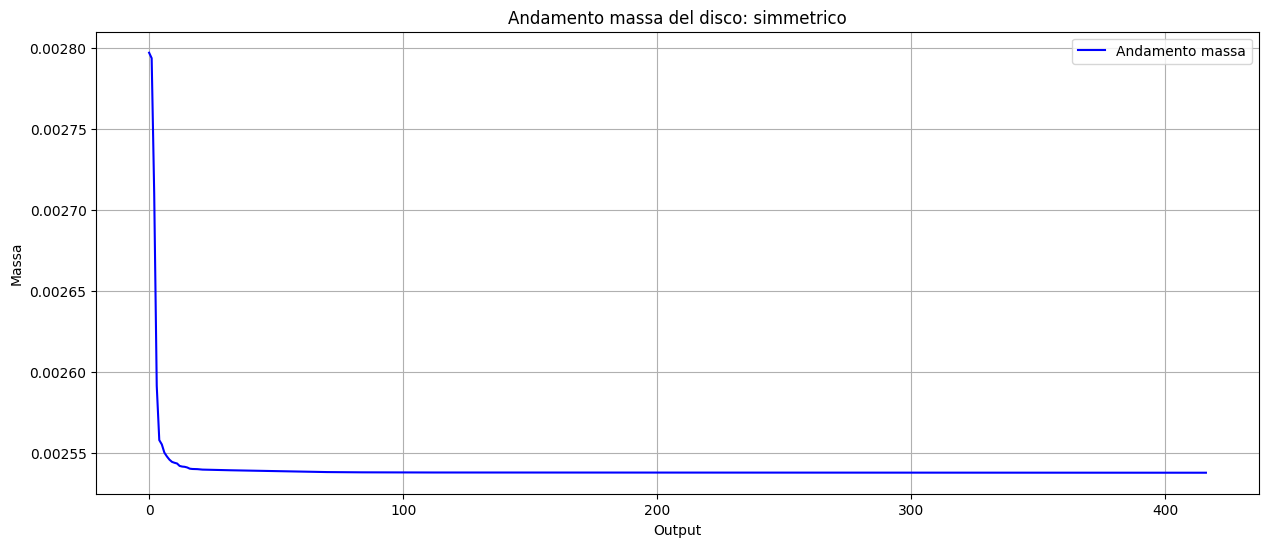

In [15]:
fig = plt.figure(figsize=(15, 6))

#Asse x grafici
x = np.zeros(417)
for i in range(0, len(x)):
    x[i] = i

#Grafico 1
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x, mas_dis, color = 'blue', label = 'Andamento massa')
ax1.set_title('Andamento massa del disco: simmetrico')
ax1.set_xlabel('Output')
ax1.set_ylabel('Massa')
ax1.grid(True)
ax1.legend()

plt.show()

### Primi output

Noto che la massa del disco decresce sostanzialmente durante i primi dieci output. Vado allora a investigare quanto accada in questo periodo di tempo.

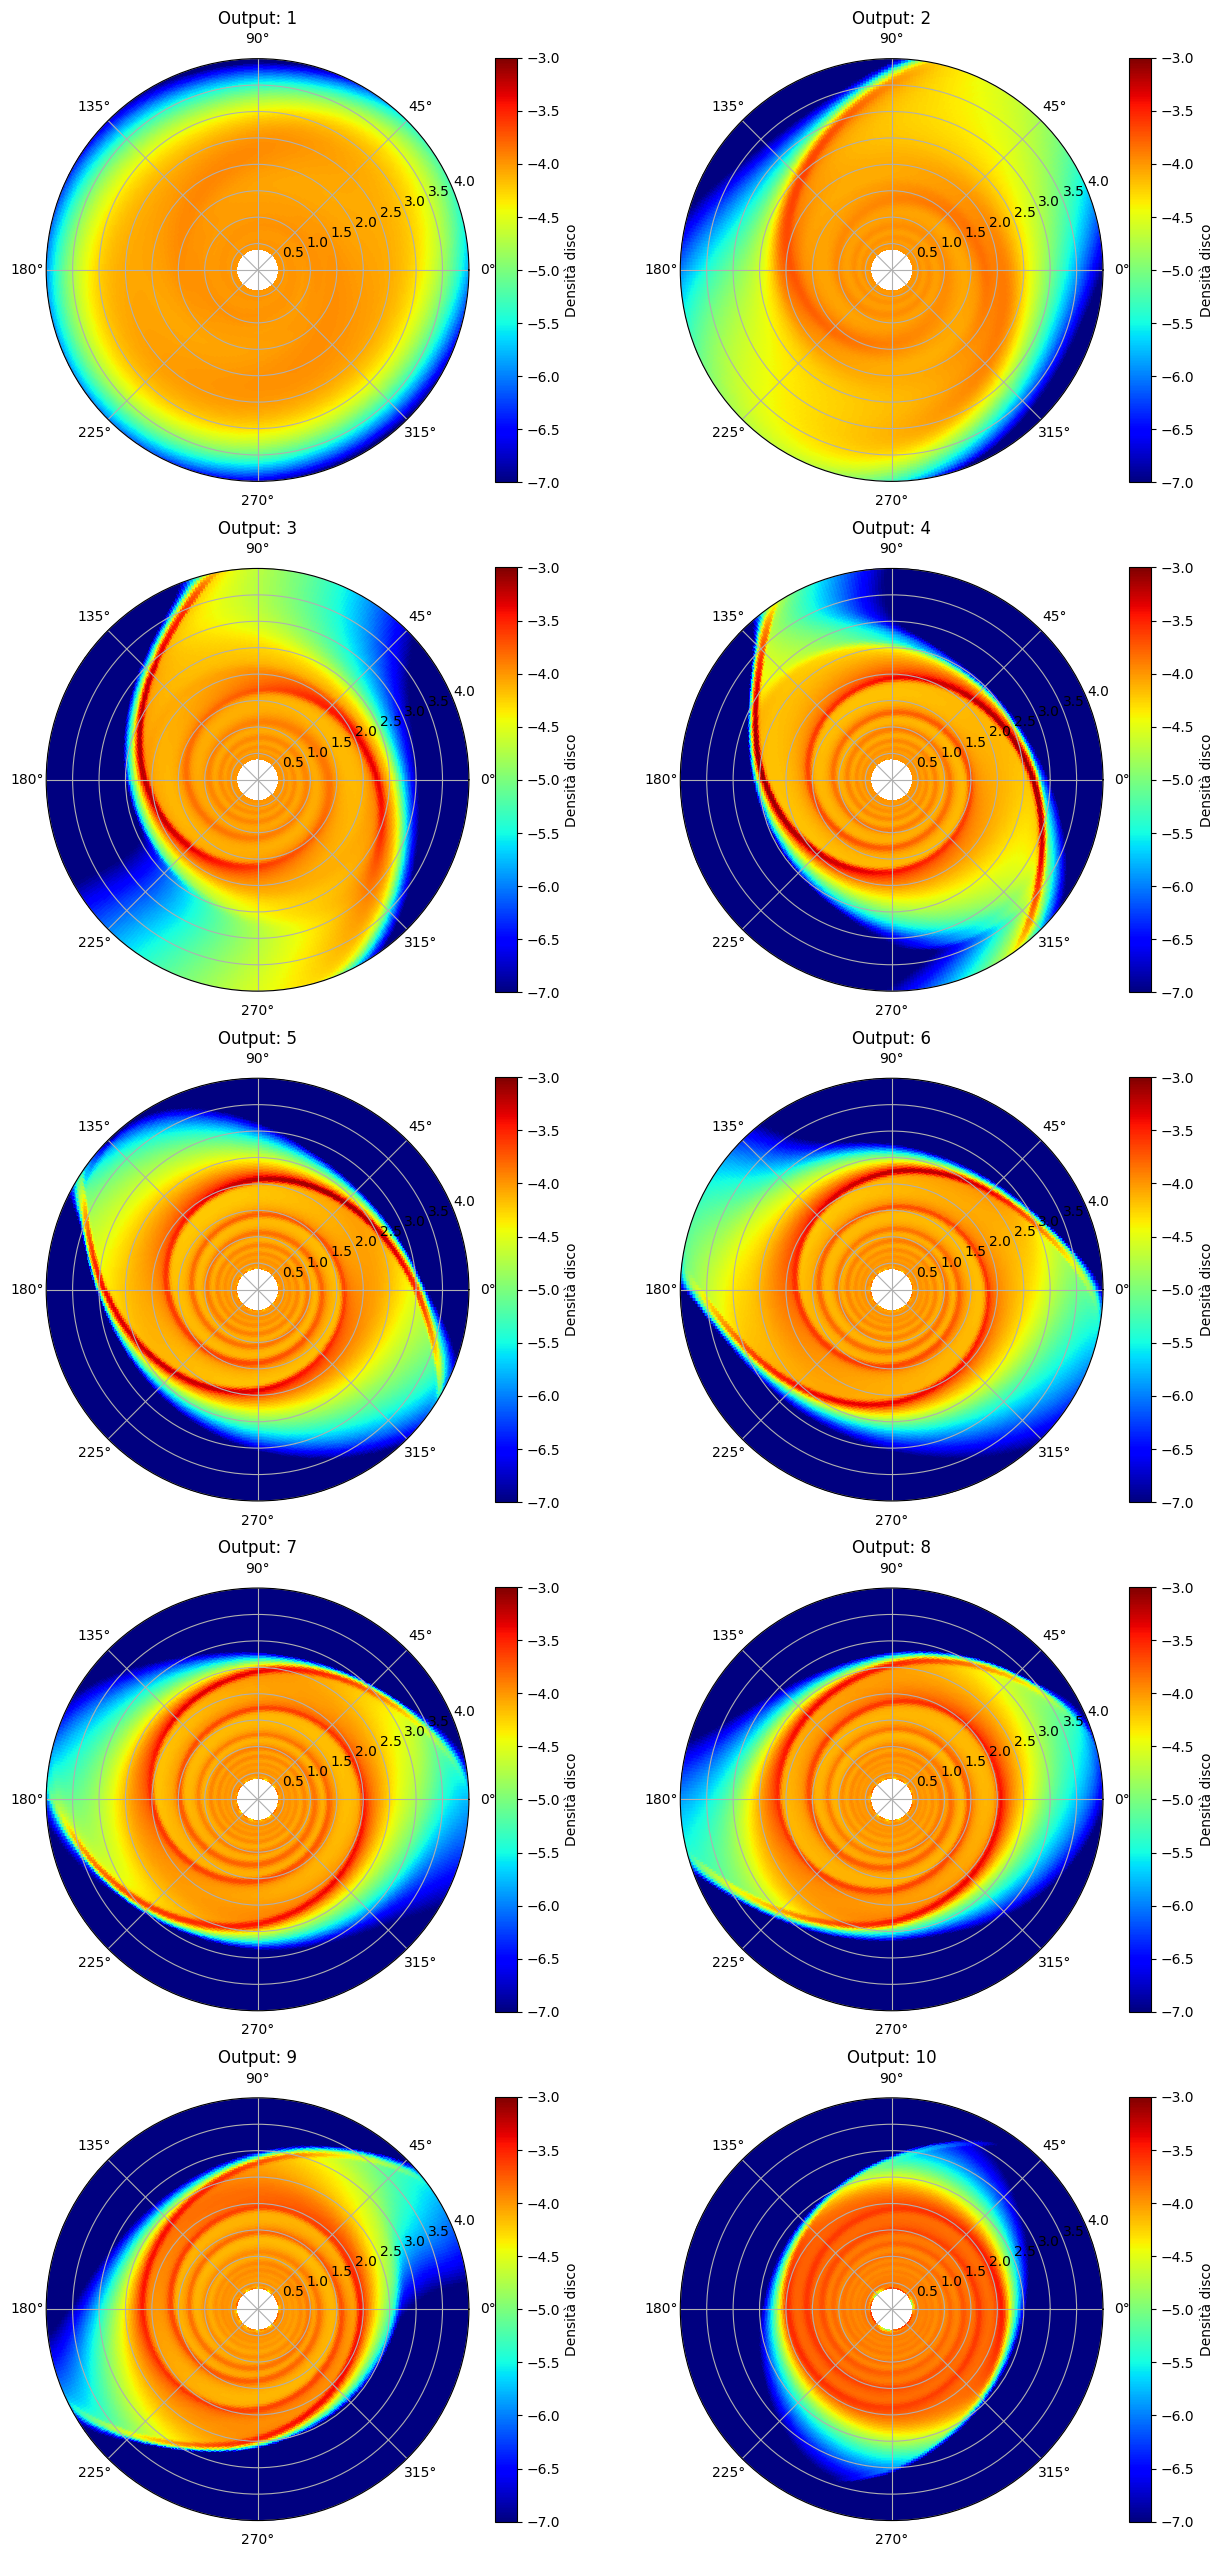

In [16]:
### Orbite
# Impostare il numero di grafici polari che desideri nella stessa figura
num_grafici = 10

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 384)
r = np.linspace(0.4, 4, 128)
Theta, R = np.meshgrid(theta, r)

# Creare una figura con più grafici polari
fig, axs = plt.subplots(5, 2, figsize=(15, 32), subplot_kw={'projection': 'polar'})

for i in range(0, 5):
    for j in range(0, 2):
        ax = axs[i, j]

        if 2*i + j < 9:
            #Valori assunti dalla funzione
            rho = np.fromfile("Dati/Sistema3/QuintaRun/gasdens"+ str((2*i+j+1)) + ".dat").reshape(128, 384)

        else:
            #Valori assunti dalla funzione
            rho = np.fromfile("Dati/Sistema3/QuintaRun/gasdens416.dat").reshape(128, 384)

        # Disegnare il grafico polare
        cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax = -3)
        plt.colorbar(cax, label='Densità disco')
        ax.set_rmin(0)
        ax.set_rmax(4)
        ax.set_title(f'Output: ' + str((2*i+j+1)))
    
    

# Mostrare la figura con i grafici polari multipli
plt.show()

<center>

# <span style="color:blue;">Sesta run: utilizzo indaco</span>

<center>

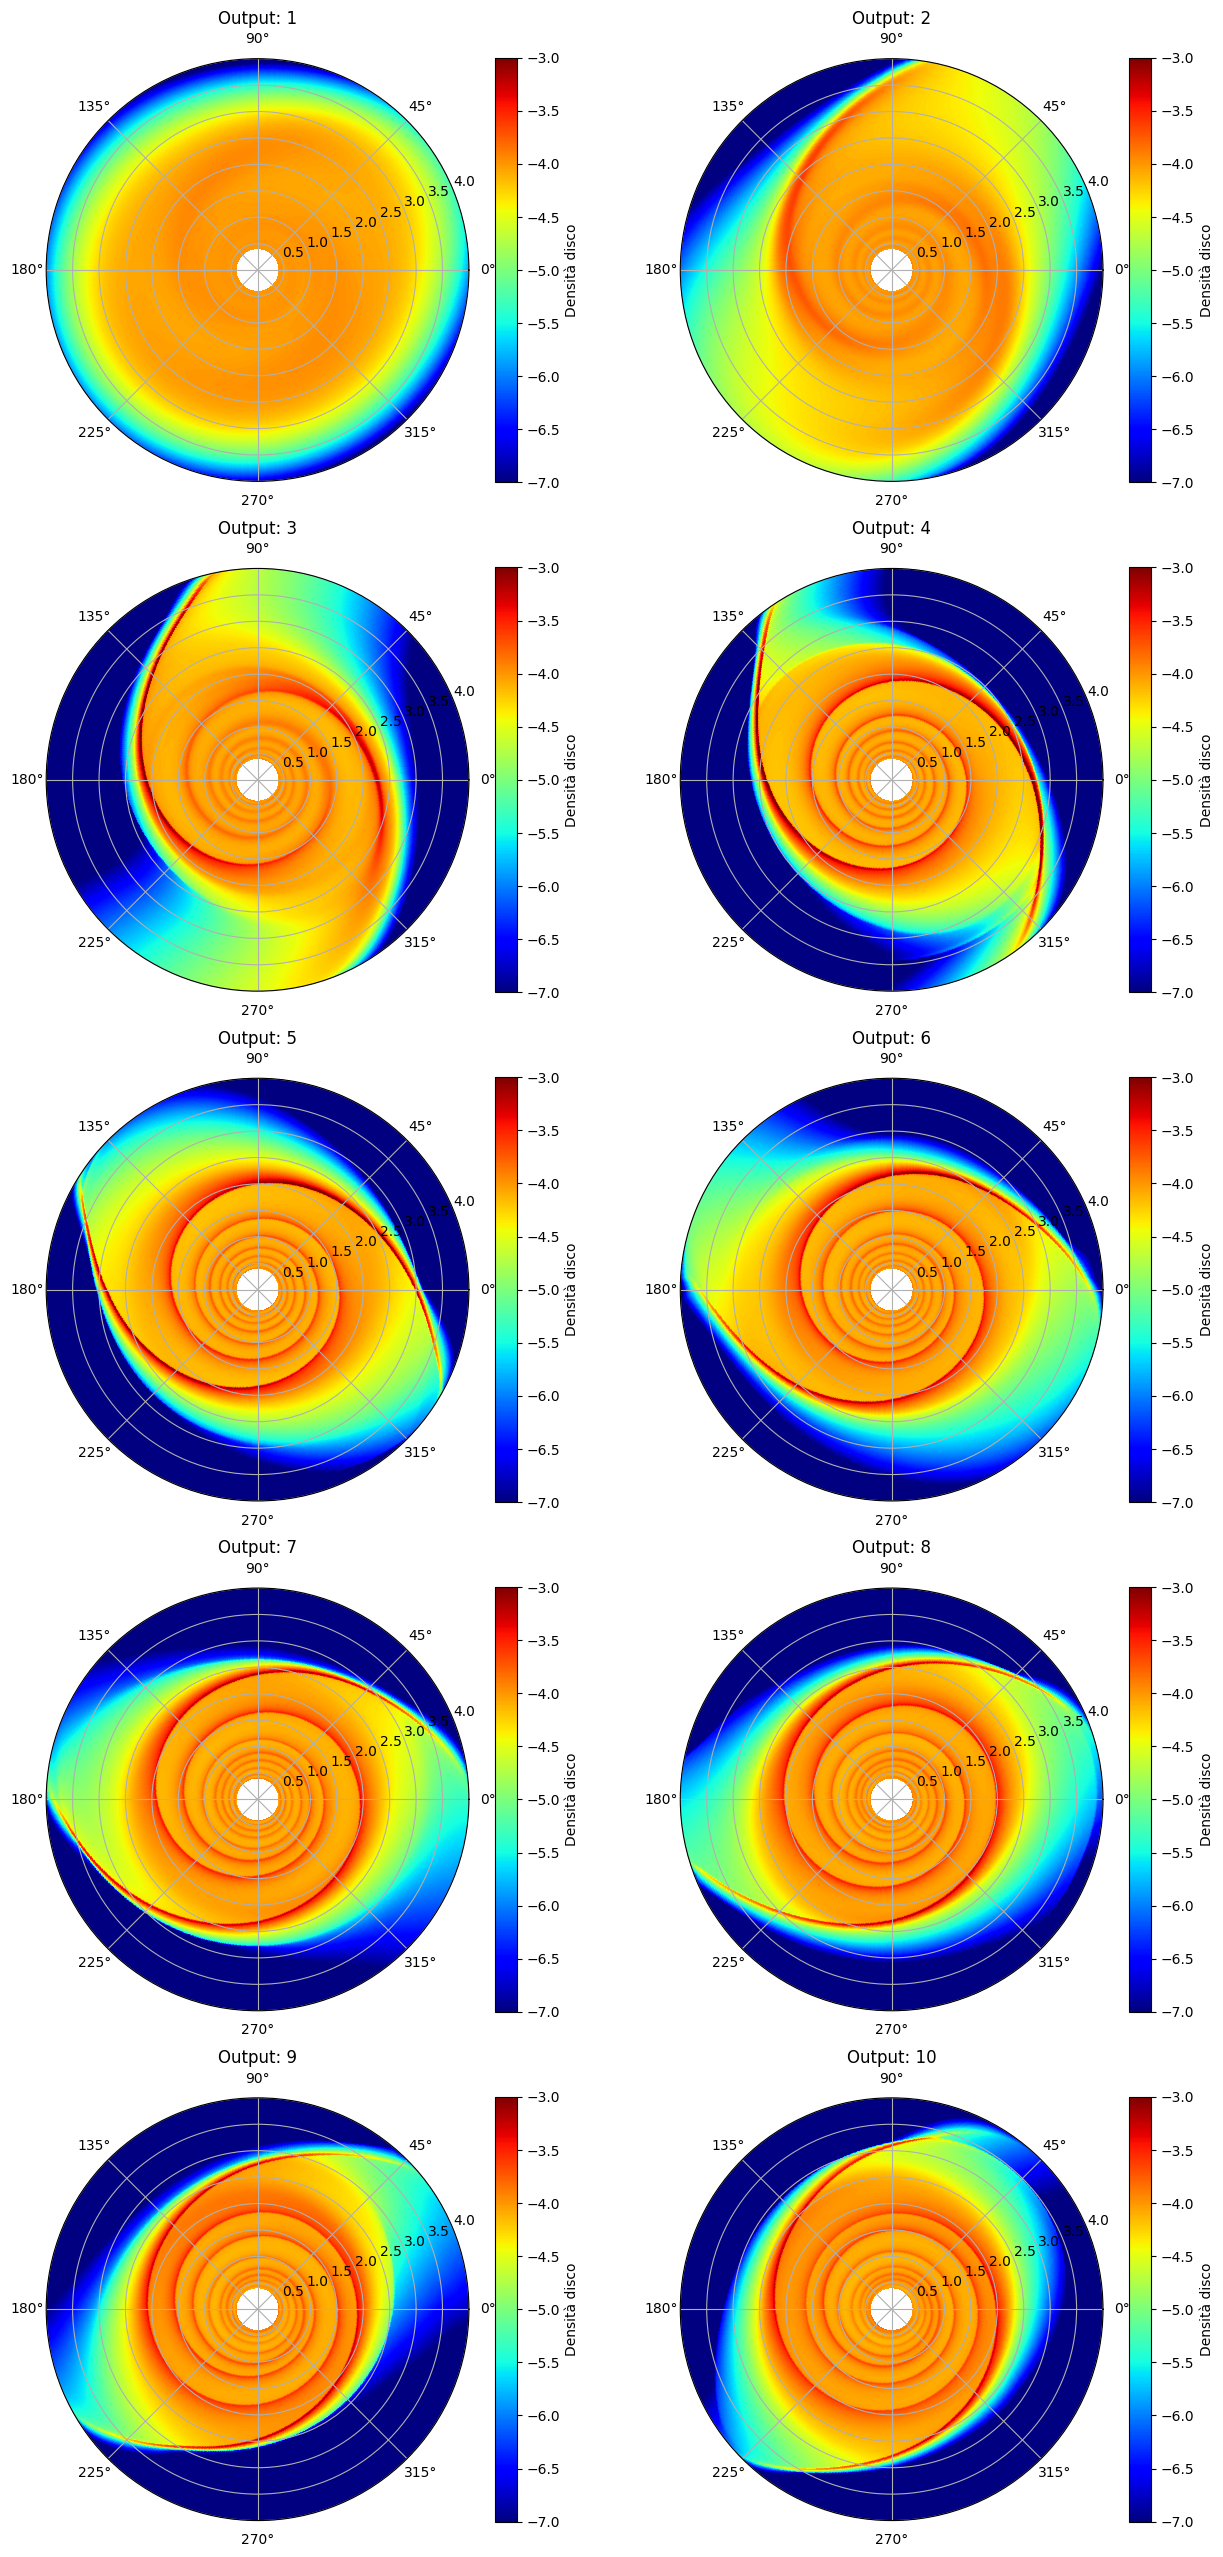

In [17]:
# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 1152)
r = np.linspace(0.4, 4, 384)
Theta, R = np.meshgrid(theta, r)

# Creare una figura con più grafici polari
fig, axs = plt.subplots(5, 2, figsize=(15, 32), subplot_kw={'projection': 'polar'})

for i in range(0, 5):
    for j in range(0, 2):
        ax = axs[i, j]

        #Valori assunti dalla funzione
        rho = np.fromfile("Dati/Sistema3/SestaRun/gasdens"+ str((2*i+j+1)) + ".dat").reshape(384, 1152)

        # Disegnare il grafico polare
        cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
        plt.colorbar(cax, label='Densità disco')
        ax.set_rmin(0)
        ax.set_rmax(4)
        ax.set_title(f'Output: ' + str((2*i+j+1)))
    
    

# Mostrare la figura con i grafici polari multipli
plt.show()